<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></div>

# Описание проекта

## Цель проекта

Цель данного проекта заключается в разработке прототипа модели машинного обучения, которая должна предсказывать коэффициент восстановления золота из золотосодержащей руды основываясь на данных с параметрами добычи и отчистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Структура проекта

Проект разделен на три основные части:

1. **Обработка и анализ данных**
   - Подробное описание исходных данных и их структуры.
   - Предварительный анализ данных и выявление основных характеристик.
   - Визуализация данных для лучшего понимания.
   
2. **Обучение моделей**
   - Введение в разработку и обучение моделей.
   - Декомпозиция задачи на локальные задачи.
   - Описание методологии и методов обучения моделей.
   - Подбор и обучение моделей.

3. **Подведение итогов**
   - Выводы из анализа данных и обучения моделей.
   - Оценка результатов моделирования и их интерпретация.
   - Рекомендации на основе полученных результатов.

## Подготовка данных

В начале работы загружаем все необходимые нам библиотеки и дополнения.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer 
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor

In [2]:
data_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')

Сохраним имеющиеся данные из файлов в отдельные переменные и изучим их подробнее.

In [3]:
display(data_full.head())
data_full.info();

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


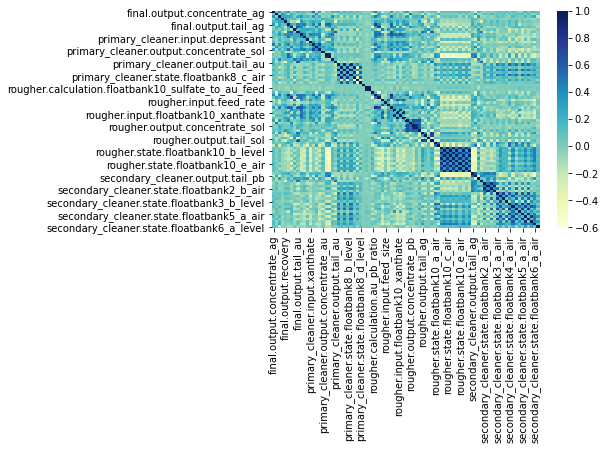

In [4]:
matrix_data_full=data_full.corr()
sns.heatmap(matrix_data_full, cmap="YlGnBu")
plt.show()

In [5]:
display(data_test.head())
data_test.info();

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

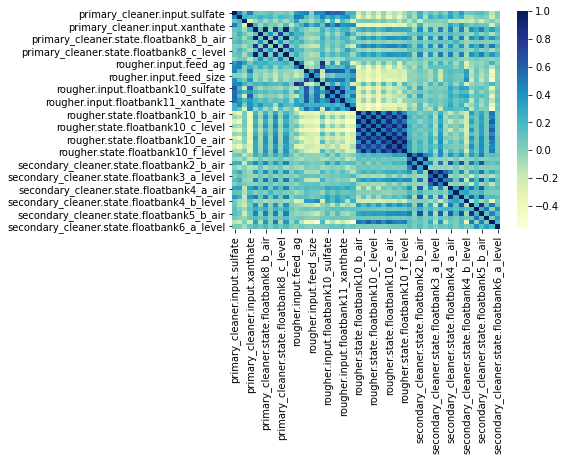

In [6]:
matrix_data_test=data_test.corr()
sns.heatmap(matrix_data_test, cmap="YlGnBu")
plt.show()

In [7]:
display(data_train.head())
data_train.info();

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


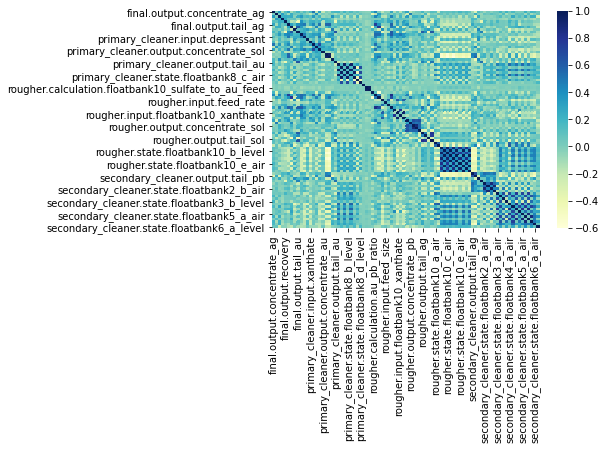

In [8]:
matrix_data_train=data_train.corr()
sns.heatmap(matrix_data_train, cmap="YlGnBu")
plt.show()

In [9]:
print(data_full.duplicated().sum())
print(data_test.duplicated().sum())
print(data_train.duplicated().sum())

0
0
0


In [10]:
print('Рaзмер data_full:',data_full.shape)
print('Рaзмер data_test:',data_test.shape)
print('Рaзмер data_train:',data_train.shape)

Рaзмер data_full: (19439, 87)
Рaзмер data_test: (5290, 53)
Рaзмер data_train: (14149, 87)


Все данные в столбцах (кроме столбца date) имеют верный формат float. В данный всех трех файлов имеются пропуски. Исходный файл разделен на тестовую и тренировочную выборки(27/73).Была проверена корреляция каждой выборки, так как при высокой зависимости мы могли бы получить некорректное обучение одной из моделей. В тестовой выборке отсутсвует 34 стобца (признака). Проверим корректность имеющейся эффективности обогащения на rougher.output.recovery из тренировочной выборки. recovery= ((C * (F-T))/(F * (C-T)))*100

In [11]:
def recovery(data):
    c= data['rougher.output.concentrate_au'].dropna()
    f= data['rougher.input.feed_au'].dropna()
    t= data['rougher.output.tail_au'].dropna()
    r= (c*(f-t))/(f*(c-t))*100
    
    data['recovery']=abs(r[(r >= 0) & (r <= 100)])

In [12]:
recovery(data_train)

In [13]:
data_train['recovery']=pd.Series(data_train['recovery'])

Расчитаем МАЕ показателей

In [14]:
mean_absolute_error(data_train['rougher.output.recovery'],data_train['recovery']).round(4)

0.0

Проверка показала, что значения эффективности обогащения расчитаны верно. Ранее было обнаружено, что в тестовой выборке отсутсвуют некоторые параметры. Выясним что это за параметры.

In [15]:
anadd_columns=pd.Series(data_train.drop(data_test.columns,axis=1).columns)
anadd_columns

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

Из получившегося списка можно выделить только стобец final.output.recovery и столбец rougher.output.recovery, не вошедшие в тестовую выборку,, данные этих признаков не являются промежуточными и понадобятся нам для дальнейшей работы. Добавим данные этих признаков в тестовую выборку.

In [16]:
data_test = ((data_test.merge(data_full[['date', 'final.output.recovery', 'rougher.output.recovery']],\
                              how='outer', on='date')).dropna(subset=['rougher.input.feed_au']))
data_test.shape

(5290, 55)

Мы уже проверили данные на наличие полных дубликатов и помним , что в каждом наборе данных имеются пропуски. Пропуски в целевых признаках удалим, а в нецелевых признаках заполним приближенными значениями.

In [17]:
data_train=data_train.dropna(subset=['rougher.output.recovery','final.output.recovery'])
data_test=data_test.dropna(subset=['rougher.output.recovery','final.output.recovery'])

In [18]:
data_train=data_train.ffill().reset_index(drop = True)
data_test=data_test.ffill().reset_index(drop = True)

In [19]:
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 88 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


Тестовая и тренировочная выборки отличаются по количесвту нецелевых признаков, это может помешать в обучении нашей моедли в дальнейшем. Так как мы уже добавили в тестовую выборку необходимые нам целевые признаки, оставим в тренировочной выборке только те нецелевые признаки, которые есть в тестовой выборке.

In [20]:
data_train=data_train[data_test.columns]

In [21]:
print('Рaзмер data_train:',data_train.shape)
print('Рaзмер data_test:',data_test.shape)

Рaзмер data_train: (14149, 55)
Рaзмер data_test: (5290, 55)


## Анализ данных

Посмотрим как меняется концентрация металов на разных стадиях очистки.

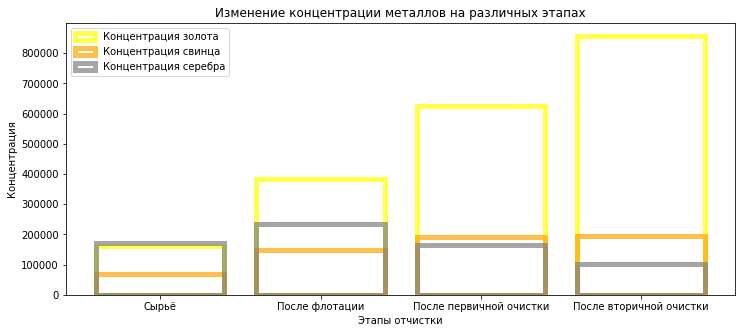

In [22]:
plt.figure(figsize=(12, 5))

x_values = ('Сырьё', 'После флотации', 'После первичной очистки', 'После вторичной очистки')

y_values_pb = (
    data_full['rougher.input.feed_pb'].sum(), 
    data_full['rougher.output.concentrate_pb'].sum(), 
    data_full['primary_cleaner.output.concentrate_pb'].sum(), 
    data_full['final.output.concentrate_pb'].sum()
)

y_values_ag = (
    data_full['rougher.input.feed_ag'].sum(), 
    data_full['rougher.output.concentrate_ag'].sum(), 
    data_full['primary_cleaner.output.concentrate_ag'].sum(), 
    data_full['final.output.concentrate_ag'].sum()
)

y_values_au = (
    data_full['rougher.input.feed_au'].sum(), 
    data_full['rougher.output.concentrate_au'].sum(), 
    data_full['primary_cleaner.output.concentrate_au'].sum(), 
    data_full['final.output.concentrate_au'].sum()
)
plt.bar(x_values, y_values_au, label='Концентрация золота',\
        facecolor='none',alpha=0.7, edgecolor='yellow', linewidth=5)
plt.bar(x_values, y_values_pb, label='Концентрация свинца',\
        facecolor='none',alpha=0.7, edgecolor='orange', linewidth=5)
plt.bar(x_values, y_values_ag, label='Концентрация серебра',\
        facecolor='none',alpha=0.7, edgecolor='grey', linewidth=5)


plt.title("Изменение концентрации металлов на различных этапах")
plt.xlabel("Этапы отчистки")
plt.ylabel("Концентрация")
plt.legend()
plt.show()


На графике видно, что концентрация золота с каждым этапом увеличивается и превосходит по объему другие компоненты. Концентрация свинца также на каждом этапе растет, чего нельзя сказать о концентрации серебра. 

Проверим имеет ли различие размер гранул в тестовой и валидационной выборках, это тоже немаловажный фактор корректного обучения моделей

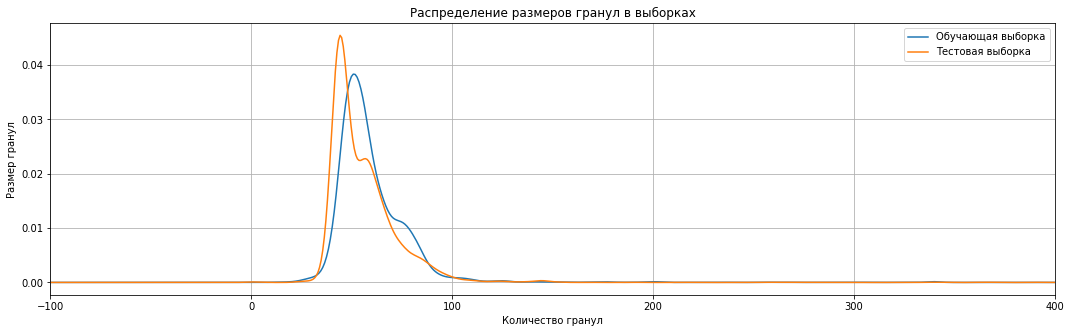

In [23]:
plt.figure(figsize=(18, 5))

data_train['rougher.input.feed_size'].sort_values(ascending= True).plot.kde(label='Обучающая выборка')
data_test['rougher.input.feed_size'].sort_values(ascending= True).plot.kde(label='Тестовая выборка')

plt.xlim(-100,400)
plt.title("Распределение размеров гранул в выборках")
plt.xlabel("Количество гранул")
plt.ylabel("Размер гранул")
plt.grid(True)
plt.legend()
plt.show;

Размер гранул в выборка имеет незначительное различие, это не окажет сильного негативного влияния поэтому не будем его корректировать

Проведем исследование суммарной концентрации всех веществ на разных стадиях обработки:в сырье, в черновом и финальном концентратах.

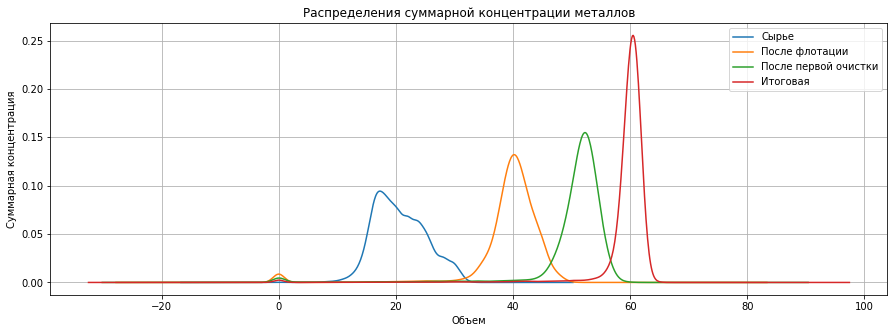

In [24]:
plt.figure(figsize=(15, 5))

input_rougher = (
        data_full['rougher.input.feed_au'] + 
        data_full['rougher.input.feed_ag'] + 
        data_full['rougher.input.feed_pb']
    ).plot.kde(label='Сырье')

output_rougher = (
        data_full['rougher.output.concentrate_au'] +
        data_full['rougher.output.concentrate_ag'] +
        data_full['rougher.output.concentrate_pb']
    ).plot.kde(label='После флотации')

output_cleaner = (
        data_full['primary_cleaner.output.concentrate_au'] +
        data_full['primary_cleaner.output.concentrate_ag'] +
        data_full['primary_cleaner.output.concentrate_pb']
    ).plot.kde(label='После первой очистки')

output_final = (
        data_full['final.output.concentrate_au'] +
        data_full['final.output.concentrate_ag'] +
        data_full['final.output.concentrate_pb']
    ).plot.kde(label='Итоговая')
    
plt.title("Распределения суммарной концентрации металлов")
plt.xlabel("Объем")
plt.ylabel("Суммарная концентрация")
plt.grid(True)
plt.legend()
plt.show;

Суммарная концентрация металлов после каждого этапа обработки стабильно увеличивается. В "хвосты" не уходит значительная часть важных веществ. На графике видны выбросы около 0, такие данные помешают нашей модели, поэтому проанализируем суммарную концентрацию каждого вещества и удалим аномалии из выборки. Для начала напишем функцию, которая расчитает сумму концентраций и добавит их в качестве нового столбца в каждую выборку.В тестовую и тренировочную выборку добавляем новые данные путем объединения таблиц по дате из полного датасета.


In [25]:
def concentrat(data,ag,au,pb):
    ag=data[ag]
    au=data[au]
    pb=data[pb]
    sum_column=ag+au+pb
    return sum_column

In [26]:
data_full['sum_concentration'] = concentrat(data_full,'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb')

In [27]:
new_data=data_full[['date','sum_concentration']]

data_train = data_train.merge (new_data, on='date', how='left')

data_test = data_test.merge (new_data, on='date', how='left')

Теперь, благодаря добавленному столбцу, мы можем определить аномалии и убрать их из данных. Для удобства создадим простую функцию, отсеивающую из выборки значения выше порогового.

In [28]:
def delete_trash(data,column,threshold):
    data=data[data[column] > threshold]
    return data

Для созданных столбцов посмотрим численное описание данных чтобы выбрать необходимый нам порог.

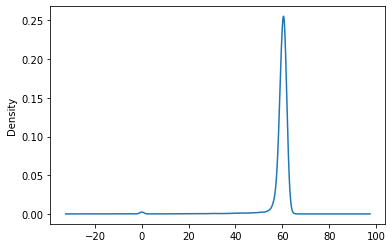

In [29]:
data_full['sum_concentration'].describe()
data_full['sum_concentration'].plot.kde();

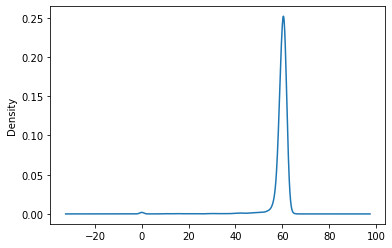

In [30]:
data_train['sum_concentration'].describe()
data_train['sum_concentration'].plot.kde();

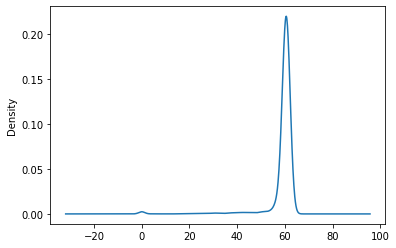

In [31]:
data_test['sum_concentration'].describe()
data_test['sum_concentration'].plot.kde();

Опираясь на значения стандартного отклонения и среднего значения поставим для каждой выборки порог в 50.

In [32]:
data_full=delete_trash(data_full,'sum_concentration', 50)
data_test=delete_trash(data_test,'sum_concentration', 50)
data_train=delete_trash(data_train,'sum_concentration', 50)

count    18862.000000
mean        60.113251
std          1.599453
min         50.000861
25%         59.402173
50%         60.355119
75%         61.124889
max         64.968881
Name: sum_concentration, dtype: float64

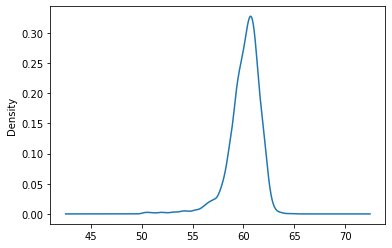

In [33]:
data_full['sum_concentration'].plot.kde();
data_full['sum_concentration'].describe()

count    5082.000000
mean       60.283437
std         1.598278
min        50.103282
25%        59.647806
50%        60.506436
75%        61.242983
max        63.809530
Name: sum_concentration, dtype: float64

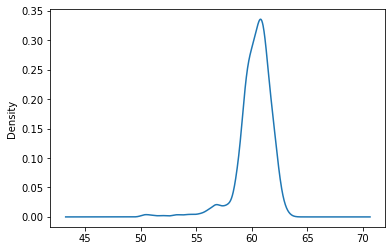

In [34]:
data_test['sum_concentration'].plot.kde();
data_test['sum_concentration'].describe()

count    13780.000000
mean        60.050488
std          1.595369
min         50.000861
25%         59.296663
50%         60.300821
75%         61.077911
max         64.968881
Name: sum_concentration, dtype: float64

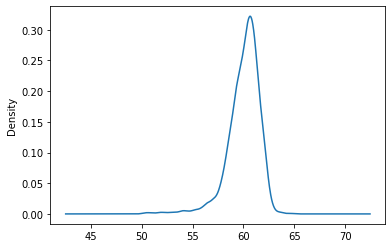

In [35]:
data_train['sum_concentration'].plot.kde();
data_train['sum_concentration'].describe()

Готово, данные скорректированы. Теперь удалим созданные нами столбцы, в дальнейшем они нам не понядобятся и могут привести к переобучению модели.

In [36]:
data_train = data_train.drop(['sum_concentration'], axis=1)
data_test = data_test.drop(['sum_concentration'], axis=1)

## Модель

Перед тем как начать обучение моделей и проверять их качество, напишем функции для вычисления sMAPE и итогового sMAPE. Они помогут нам в будущем определить насколько хорошо модель сделала предсказание двух признаков: rougher.output.recovery и final.output.recovery.

In [37]:
def smape(target,predict):
    results = abs(target - predict) / ((abs(target) + abs(predict)) / 2)
    return -1*((results.sum() / len(results)) * 100).round(2)

In [38]:
def fin_smape(result,final):
    fin_smape = (0.25*result)+(0.75*final)
    return fin_smape.round(2)

Также перед обучением необходимо разбить тренировочную выборку на признаки по которым модель будет обучаться и по которым мы сможем выяснить как хорошо модель обучилась.

In [39]:
features=data_train.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher=data_train['rougher.output.recovery']
target_final=data_train['final.output.recovery']
state=12345

Наши модели необходимо будет проверять посредством кросс-валидации, для этого создадим отдельную функцию.

In [40]:
def cross_check(model):
    score_val_r = (cross_val_score(model, features, target_rougher, cv=5, scoring=make_scorer(smape, greater_is_better=False))).mean() 
    print('Cреднее значение sMAPE для `rougher`: ',score_val_r.round(2))

    
    score_val_f = (cross_val_score(model, features, target_final, cv=5, scoring=make_scorer(smape, greater_is_better=False))).mean() 
    print('Cреднее значение sMAPE для `final`: ',score_val_f.round(2))

    fin_score= fin_smape(score_val_r,score_val_f)
    print('Итоговое sMAPE модели на кросс-валидации: ',fin_score.round(2)) 

### Дерево решений

Сначала оцениваем модель посредством кросс-валидации и созданной ранее функции

In [41]:
cross_check(DecisionTreeRegressor(random_state=state))

Cреднее значение sMAPE для `rougher`:  17.39
Cреднее значение sMAPE для `final`:  15.37
Итоговое sMAPE модели на кросс-валидации:  15.88


Методом перебора выбирае глубину дерева, при которой модель даст оптимальные результаты

In [42]:
best_result_r = 100
best_depth = 0
for depth in range(1, 50):
    model_dtr_r = DecisionTreeRegressor(random_state=state, max_depth=depth)
    result = -1*cross_val_score(model_dtr_r,features,target_rougher, cv=5, scoring=make_scorer(smape, greater_is_better=True)).mean()

    if result < best_result_r:
        best_result_r = result
        best_depth = depth

print("Лучшее значение sMAPE модели для 'rougher.output.recovery':", best_result_r)
print("Количество деревьев:", best_depth)

Лучшее значение sMAPE модели для 'rougher.output.recovery': 11.376000000000001
Количество деревьев: 5


In [43]:
best_result_f = 100
best_depth = 0
for depth in range(1, 50):
    model_dtr_f = DecisionTreeRegressor(random_state=state, max_depth=depth)
    result = -1*cross_val_score(model_dtr_f,features,target_final, cv=5, scoring=make_scorer(smape, greater_is_better=True)).mean()
    
    if result < best_result_f:
        best_result_f = result
        best_depth = depth

print("Лучшее значение sMAPE модели для 'final.output.recovery':", best_result_f)
print("Количество деревьев:", best_depth)

Лучшее значение sMAPE модели для 'final.output.recovery': 9.166
Количество деревьев: 2


Cимметричное среднее абсолютное процентное отклонение данной модели:

In [44]:
fin_smape(best_result_f,best_result_r)

10.82

### Случайный лес

Сначала проверим модель посредством кросс-валидации

In [45]:
cross_check(RandomForestRegressor(random_state=state))

Cреднее значение sMAPE для `rougher`:  13.27
Cреднее значение sMAPE для `final`:  9.52
Итоговое sMAPE модели на кросс-валидации:  10.46


При помощи перебора параметров определим оптимальный набор для получения наилучших показателей

In [46]:
best_result_r = 100
best_depth = 0
best_est = 0
for depth in range(1, 10):
    for est in range (5,25,5):
        model_rfr_r = RandomForestRegressor(random_state=state, max_depth=depth, n_estimators=est)
        result = -1*cross_val_score(model_rfr_r,features,target_rougher, cv=5, scoring=make_scorer(smape, greater_is_better=True)).mean()

        if result < best_result_r:
            best_result_r = result
            best_depth = depth
            best_est = est

print("Лучшее значение sMAPE модели для 'rougher.output.recovery':", best_result_r)
print("Количество деревьев:", best_depth)
print("Глубина деревьев:", best_est)

Лучшее значение sMAPE модели для 'rougher.output.recovery': 10.866000000000001
Количество деревьев: 6
Глубина деревьев: 20


In [47]:
best_result_f = 100
best_depth = 0
best_est = 0
for depth in range(1, 10):
    for est in range (5,25,5):
        model_rfr_f = RandomForestRegressor(random_state=state, max_depth=depth, n_estimators=est)
        result = -1*cross_val_score(model_rfr_f,features,target_final, cv=5, scoring=make_scorer(smape, greater_is_better=True)).mean()

        if result < best_result_f:
            best_result_f = result
            best_depth = depth
            best_est = est

print("Лучшее значение sMAPE модели для 'final.output.recovery':", best_result_f)
print("Количество деревьев:", best_depth)
print("Глубина деревьев:", best_est)

Лучшее значение sMAPE модели для 'final.output.recovery': 8.792000000000002
Количество деревьев: 4
Глубина деревьев: 20


Cимметричное среднее абсолютное процентное отклонение данной модели:

In [48]:
fin_smape(best_result_f,best_result_r)

10.35

### Линейная регрессия

Проверим модель линейной регрессии посредством кросс-валидации и посмотрим какой показатель sMAPE даст нам модель

In [49]:
cross_check(LinearRegression())

Cреднее значение sMAPE для `rougher`:  12.59
Cреднее значение sMAPE для `final`:  10.84
Итоговое sMAPE модели на кросс-валидации:  11.28


In [50]:
model_lr_r = LinearRegression()
result_r = -1*cross_val_score(
    model_lr_r, features,target_rougher,cv=5, 
    scoring=make_scorer(smape, greater_is_better=True)
).mean()
result_f = -1*cross_val_score(
    model_lr_r, features, target_final, cv=5, 
    scoring=make_scorer(smape, greater_is_better=True)
).mean()
print("Лучшее значение sMAPE модели для 'rougher.output.recovery':", result_r.round(2))
print("Лучшее значение sMAPE модели для 'final.output.recovery':", result_f.round(2))

Лучшее значение sMAPE модели для 'rougher.output.recovery': 12.59
Лучшее значение sMAPE модели для 'final.output.recovery': 10.84


Cимметричное среднее абсолютное процентное отклонение данной модели:

In [51]:
fin_smape(result_f,result_r)

12.15

Лучшие показатели нам дала модель Случайного леса(sMAPE = 10.73). Обучим данную модель на тренировочной выборке и получим предсказания по тестовой выборке. Для каждого целевого признака вводим параметры соответствующие им выше.

In [52]:
model_rfr_f = RandomForestRegressor(random_state=state, max_depth=15, n_estimators=5)
model_rfr_r = RandomForestRegressor(random_state=state, max_depth=20, n_estimators=6)

model_rfr_f.fit(features, target_final)
model_rfr_r.fit(features, target_rougher);

Выделим на тестовой выборке признаки в отдельные переменные

In [53]:
features_test = data_test.drop(['date','rougher.output.recovery', 'final.output.recovery'],\
                             axis=1)
target_test_f = data_test['final.output.recovery']
target_test_r = data_test['rougher.output.recovery']

In [54]:
predict_test_f = model_rfr_f.predict(features_test)
predict_test_r = model_rfr_r.predict(features_test)

In [55]:
smape_test_f =-1*smape(target_test_f,predict_test_f)
smape_test_r =-1*smape(target_test_r,predict_test_r)
final_smape =fin_smape(smape_test_r,smape_test_f)
print('Результаты sMAPE на тестовой выборке:',final_smape)

Результаты sMAPE на тестовой выборке: 9.36


Проверим адекватность нашей модели посредством константной модели. Для этого мы будем использовать DummyRegressor

In [56]:
const_final = DummyRegressor(strategy='mean')
const_rougher = DummyRegressor(strategy='mean')

In [57]:
const_final.fit(features, target_final)
const_rougher.fit(features, target_rougher);

In [58]:
const_predict_rougher = const_rougher.predict(features_test)
const_predict_final = const_rougher.predict(features_test)

In [59]:
const_smape_rougher = -1*smape(target_test_r, const_predict_rougher)
const_smape_final =-1* smape(target_test_f, const_predict_final)
final_smape_const = fin_smape(const_smape_rougher, const_smape_final)
print('Показатели sMAPE константной модели:',final_smape_const)

Показатели sMAPE константной модели: 16.63


## Вывод

Была проведена работа по изучению золотосодержащей руды, концентрации определенных компонентов в ней, было выявлено повышение суммарной концентрации в процессе обработки руды, обработка данных для обучения моделей, выбор оптимальной модели, пресказывающей конечные результаты обработки руды. Самой оптимальной моделью в нашей работе стала модель Случайного леса. Всего было использовано три модели: Дерево решений, Случайный лес и Линейная регрессия. Cимметричное среднее абсолютное процентное отклонение выбранной модели на тестовой выборке равно 9.36, что лучше показателя константной модели на 43.7%